## MeCabで形態素解析を行う

- 参考：[【Python】形態素解析エンジンMeCabをPythonでやってみた。 せっかくなのでパーソルP&T社長メッセージから単語を出現数順に抽出してみたよ。](https://note.com/smkt_interview/n/nafebd60ae6bc)

- 参考：[Python3 + Mecab で形態素解析してみた](https://qiita.com/Haruka-Ogawa/items/c2116f0eb5c859955d63)

- 参考：[【Python】ゲームアプリ（Google Play）のレビュー分析を行ってみた（スコア推移・形態素解析編）](https://qiita.com/hastings/items/41243ee723fe56568f60)

わかち書きとは、テキスト文章を単語に分解することを指します。

Mecabは分を単語に分解するだけでなく、各単語の品詞や読みなどの情報を付与することが可能です。このような品詞情報の付与まで含んだわかち書きを形態素解析と呼びます。

In [7]:
# 例 わかち書き
import MeCab
wakati = MeCab.Tagger("-Owakati")
wakati.parse("pythonが大好きです").split()

['python', 'が', '大好き', 'です']

In [15]:
import pandas as pd
df = pd.read_csv("moving_sq1.csv")
df = df.drop(["Unnamed: 0","compare"], axis=1)
df.head()

,date,title,rate,comment
0,2020-01-07,対応が早かった,5.00,料金が自分の納得した範囲だったので。良かった点、引越し先の部屋の状況など話を聞いてくれてアド...
1,2020-08-05,早く連絡を頂いて、対応が早くて金額にも満足でした。,4.75,悪いところはないです。丁寧な、説明をしていただき暑いなか、ありがとうございました。金額も想定...
2,2020-08-09,社内の連絡不足、そして約束を守っていただけない。,2.25,【見積もり時の対応】大変人当たりの良い方が対応して下さった。しかしお約束していた時間の5分前...
3,2020-09-10,丁寧でまた利用したいと思った,5.00,【見積もり時の対応】実際に訪問で荷物の大きさや数を確認してもらったので、引っ越し当日に見積り...
4,2020-09-18,安心してお願いできました。,5.00,引っ越しスタッフのテキパキとした指示やチームワークの働き様子に安心感があり疲労した様子も見せ...


In [18]:
#インストール
!pip install mecab-python3

#辞書インストール
!pip install unidic-lite

In [25]:
def tokenize(text):
    # Nodeオブジェクト
    node = tagger.parseToNode(text)
    # 品詞分解
    tokens_list = []

    # ループで品詞分解結果をそれぞれ取得
    while node:
        # BOS/EOS以外の結果をAppend
        if node.surface != "":
            tokens_list.append(node.surface)
        # 次の単語へ更新
        node = node.next

    return tokens_list

text   = "日本の首都は東京です。"

# 関数実行
tokenize(df["comment"][0])

['料金',
 'が',
 '自分',
 'の',
 '納得',
 'し',
 'た',
 '範囲',
 'だっ',
 'た',
 'の',
 'で',
 '。',
 '良かっ',
 'た',
 '点',
 '、',
 '引越し',
 '先',
 'の',
 '部屋',
 'の',
 '状況',
 'など',
 '話',
 'を',
 '聞い',
 'て',
 'くれ',
 'て',
 'アドバイス',
 'もらえ',
 'た']

[MeCabでリストを分かち書きしようとすると'TypeError: in method 'Tagger_parse', argument 2 of type 'char const *''が出る](https://qiita.com/katuta_games/items/7a9f9334dc5417b49367)

In [28]:
# MeCabで形態素解析を行う
import MeCab

def mecab_text(text):

    #MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
    mecab = MeCab.Tagger('-Owakati')

    #形態素解析
    text = str(text).lower() #　追加したところ
    node = mecab.parseToNode(text)

    #形態素解析した結果を格納するリスト
    wordlist = []

    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #形容詞を取得、elifで追加する
        elif node.feature.split(',')[0] == '形容詞':
            wordlist.append(node.surface)
        #動詞を取得、elifで追加する
        #elif node.feature.split(',')[0] == '動詞':
            #wordlist.append(node.surface)
        node = node.next
    return wordlist

# 形態素結果をリスト化し、データフレームdf1に結果を列追加する
df['words_comment'] = df['comment'].apply(mecab_text)
df['words_title'] = df['title'].apply(mecab_text)

# nlplot
- 参考：[NLPLOTが凄い！自然言語を可視化・分析できるPYTHONライブラリ](https://boxcode.jp/nlplot%E3%81%8C%E5%87%84%E3%81%84%EF%BC%81%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%83%BB%E5%88%86%E6%9E%90%E3%81%A7%E3%81%8D%E3%82%8Bpython%E3%83%A9%E3%82%A4)
- 参考：[nlplotを使って自然言語データを可視化してみた](https://qiita.com/DS27/items/c8576c1bd71e3ff09369)

In [30]:
! pip install nlplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.3 MB/s eta 0:00:00


 ### N-gram bar chart

In [31]:
# nlplotで直近1カ月のレビューを可視化・分析
# 頻出単語
import nlplot

npt_title = nlplot.NLPlot(df, target_col='words_title')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt_title.get_stopword(top_n=0, min_freq=0)

npt_title.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 5980/5980 [00:00<00:00, 262234.44it/s]


In [32]:
npt_comment = nlplot.NLPlot(df, target_col='words_comment')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt_comment.get_stopword(top_n=0, min_freq=0)

npt_comment.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 5980/5980 [00:00<00:00, 68575.79it/s]


### N-gram tree Map

In [33]:
# 単語数の分布
npt_title.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)


100%|██████████| 5980/5980 [00:00<00:00, 275498.54it/s]


In [34]:
# 単語数の分布
npt_comment.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)


100%|██████████| 5980/5980 [00:00<00:00, 30572.93it/s]


### Histogram of the word count

In [35]:
npt_title.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [36]:
npt_comment.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [ ]:
npt_title.wordcloud(
    stopwords=stopwords,
    width=100,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

In [ ]:
npt_comment.wordcloud(
    stopwords=stopwords,
    width=100,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5980 non-null   object 
 1   title          5968 non-null   object 
 2   rate           5980 non-null   float64
 3   comment        5980 non-null   object 
 4   words_comment  5980 non-null   object 
 5   words_title    5980 non-null   object 
dtypes: float64(1), object(5)
memory usage: 280.4+ KB


<Axes: xlabel='date'>

<Figure size 640x480 with 0 Axes>

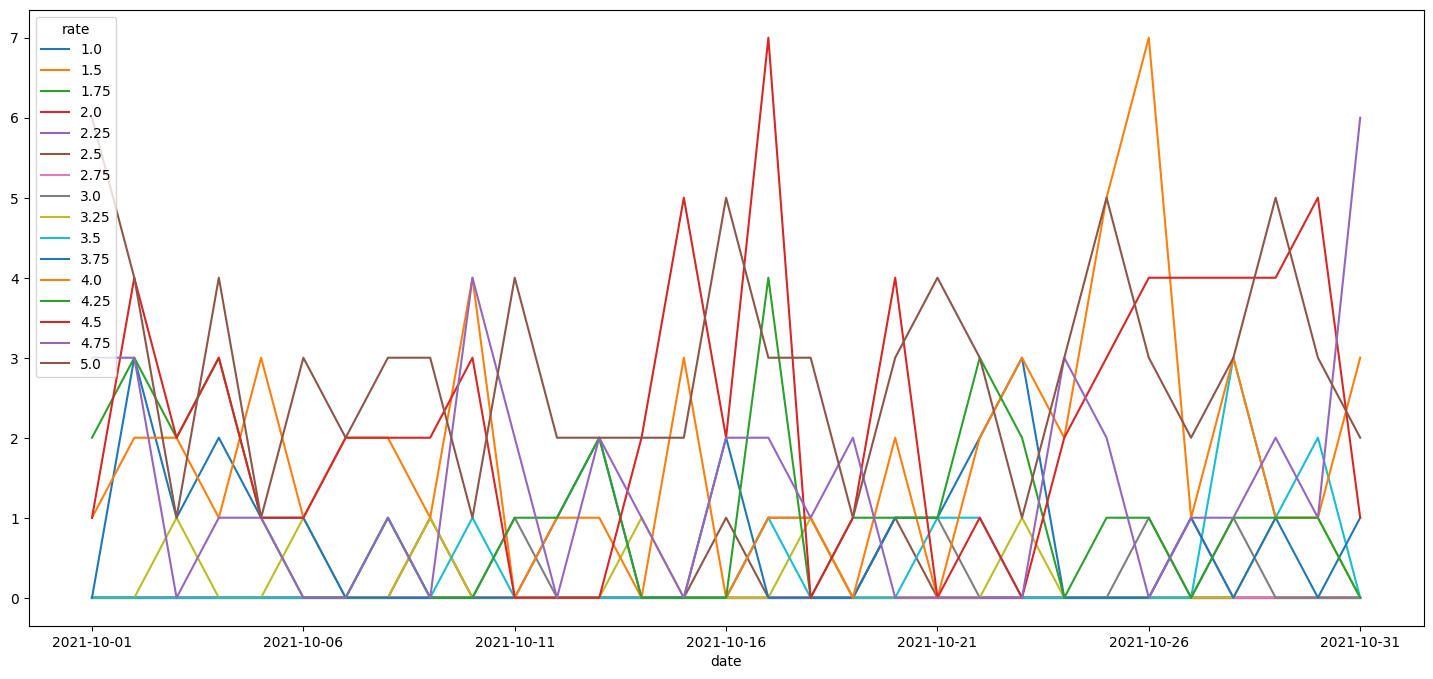

In [53]:
df_score = df[["date", "rate"]]
df_score = pd.crosstab(df["date"], df["rate"], dropna=False)
#df_score = df_score.resample('D').sum()

date_start = "2021-10-01"
date_end   = "2021-10-31"

df_score_ex = df_score[date_start:date_end]
plt.figure()
df_score_ex.plot(figsize=(18,8))